In [1]:
import numpy as np


def dist(x1, x2):
    d = np.sqrt(np.square(x1[0] - x2[0]) + np.square(x1[1] - x2[1]))
    return d


X = np.array([[1, 6],
              [5, 6],
              [8, 6],
              [5, 3],
              [1, 0],
              [5, 0],
              [8, 0]])
init1 = [3, 3]
init2 = [7, 3]
c1 = np.zeros(X.shape)
c2 = np.zeros(X.shape)
p1 = 0
p2 = 0
f = 0
for j in range(5):
    for i in range(X.shape[0]):
        if dist(X[i], init1) > dist(X[i], init2):
            c2[i] = X[i]
        else:
            c1[i] = X[i]
    p1 = [np.mean(c1[:, 0]), np.mean(c1[:, 1])]
    p2 = [np.mean(c2[:, 0]), np.mean(c2[:, 1])]
    print()
    if p1 == init1 and p2 == init2:
        f = 1
        # break
    init1 = p1
    init2 = p2
    print(p1, p2)

if f == 1:
    print('done')


[2.4285714285714284, 2.142857142857143] [2.2857142857142856, 0.8571428571428571]

[3.5714285714285716, 3.0] [3.142857142857143, 0.8571428571428571]

[3.5714285714285716, 3.0] [3.142857142857143, 0.8571428571428571]

[3.5714285714285716, 3.0] [3.142857142857143, 0.8571428571428571]

[3.5714285714285716, 3.0] [3.142857142857143, 0.8571428571428571]
done


(1000, 784)
(6000, 2)


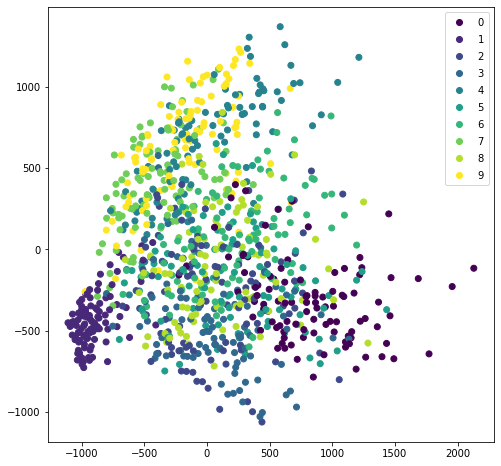

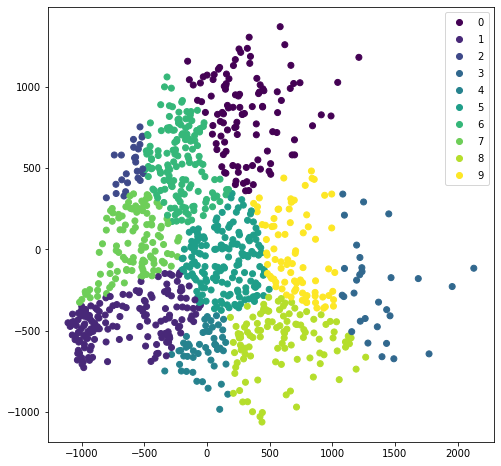

In [3]:
from __future__ import print_function


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score


def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
   
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
   
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
       
    return (data, labels)


train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
pca = PCA(n_components=2)
pca.fit(test_data)
test = pca.transform(test_data)
pca.fit(train_data)
train = pca.transform(train_data)
print(test_data.shape)
print(train.shape)
kmeans = KMeans(n_clusters=10, random_state=0).fit(train)


predicted = kmeans.predict(test)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(test[:,0],test[:,1],c=test_labels)
ax.legend(*scatter.legend_elements())
plt.show()




fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(test[:,0],test[:,1],c=predicted)
ax.legend(*scatter.legend_elements())
plt.show()